# Reading the data

In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Photometric Data

In [2]:
data1 = fits.open('data/hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1_sfr-gdn-cat.fits')

In [3]:
data1.info()

Filename: data/hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1_sfr-gdn-cat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     68   35445R x 30C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
print(data1[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  240 / length of dimension 1                          NAXIS2  =                35445 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   30 / number of table fields                         TTYPE1  = 'ID      '                                                            TFORM1  = 'K       '                                                            TTYPE2  = 'z       '                                                            TFORM2  = 'D       '                                                            TTYPE3  = 'Flux_MIPS24'                 

In [5]:
print(data1[1].header[2])

2


In [6]:
pd.DataFrame(data1[1].data)

,ID,z,Flux_MIPS24,Flux_MIPS70,Flux_PACS_100,Flux_PACS_160,Flux_SPIRE_250,Flux_SPIRE_350,Flux_SPIRE_500,Flux_Err_MIPS24,...,SFR-IR,SFR-UV_obs_160,SFR-UV_obs_280,beta,A_UV_160,A_UV_280,A_V,SFR-UV_corr_160,SFR-UV_corr_280,SFR-IR_W11
0,1,2.3400,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-41.561500,1.29100,6.346000,-0.7388,2.960,2.155,1.200,19.711100,46.178800,-41.5600
1,2,7.9501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,21.34000,21.380000,-2.2678,0.000,0.000,0.000,21.336600,21.381100,-0.0000
2,3,8.8401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,0.09324,14.870000,-2.2261,0.000,0.000,0.000,0.093242,14.871200,-0.0000
3,4,8.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,71.09000,76.660000,-2.0848,0.312,0.238,0.126,94.740200,95.414800,-0.0000
4,5,0.2600,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.182565,0.00182,0.009427,0.9430,3.142,1.462,1.274,0.032868,0.036249,-0.1826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35440,35447,1.0300,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.441530,0.15590,0.365900,-2.2261,0.000,0.000,0.000,0.155896,0.365876,-5.4420
35441,35448,1.6300,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-22.319800,0.18460,0.248700,-1.6751,0.819,0.651,0.332,0.392667,0.453129,-22.3200
35442,35449,2.6500,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-81.061800,1.51900,1.999000,-1.7264,1.002,0.613,0.406,3.821880,3.515540,-81.0600
35443,35450,2.9200,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-141.465000,0.56180,0.763200,-1.6440,0.858,0.679,0.348,1.237580,1.426680,-141.5000


In [11]:
data1[1].data[6][6]

6617.2

In [8]:
type('data1[1].data[6][6]')

str

In [7]:
arr1 = pd.DataFrame(data1[1].data).to_numpy()

In [8]:
type(arr1)

numpy.ndarray

In [10]:
arr1[arr1[:,5]>0].shape

(725, 30)

## Redshift Data

In [12]:
data2 = fits.open('data/hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1_redshift-cat.fits')

In [13]:
pd.DataFrame(data2[1].data)

,ID,zspec,zspecflag,zref,ztier,ztier_err,ztier_class,zbest
0,1,0.0000,0.0,---,2.335,3.229,3,2.335
1,2,0.0000,0.0,---,7.950,1.460,3,7.950
2,3,0.0000,0.0,---,8.837,0.634,3,8.837
3,4,0.0000,0.0,---,8.002,2.099,3,8.002
4,5,0.0000,0.0,---,0.255,0.025,3,0.255
...,...,...,...,...,...,...,...,...
35440,35447,0.9372,3.0,Cooper11,1.026,0.149,2,1.026
35441,35448,0.0000,0.0,---,1.626,0.334,3,1.626
35442,35449,0.0000,0.0,---,2.649,0.042,2,2.649
35443,35450,0.0000,0.0,---,2.920,0.624,3,2.920


In [14]:
arr2 = pd.DataFrame(data2[1].data).to_numpy()

In [15]:
arr2[arr2[:,1]>0].shape

(3656, 8)

## Merging and the final dataframe

In [16]:
df = pd.merge(pd.DataFrame(data1[1].data),pd.DataFrame(data2[1].data),on='ID')

In [17]:
df

,ID,IAU_Name,RA,DEC,FLAGS,CLASS_STAR,Xray,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,...,IRAC_CH2_SCANDELS_FLUXERR,IRAC_CH3_FLUXERR,IRAC_CH4_FLUXERR,zspec,zspecflag,zref,ztier,ztier_err,ztier_class,zbest
0,1,CANDELS_GDN_J123636.5+620530.4,189.152162,62.091778,0,0,-99.0,0.02614,-99.00000,-99.00000,...,-99.00000,-99.00000,-99.00000,0.0000,0.0,---,2.335,3.229,3,2.335
1,2,CANDELS_GDN_J123635.7+620531.3,189.148834,62.092027,0,0,-99.0,0.02920,0.00225,-99.00000,...,0.13546,-99.00000,-99.00000,0.0000,0.0,---,7.950,1.460,3,7.950
2,3,CANDELS_GDN_J123636.3+620531.7,189.151338,62.092132,0,0,-99.0,0.01054,0.01018,0.01698,...,0.14498,1.01669,1.55440,0.0000,0.0,---,8.837,0.634,3,8.837
3,4,CANDELS_GDN_J123635.9+620531.6,189.149606,62.092117,0,0,-99.0,-99.00000,-99.00000,-99.00000,...,0.13161,-99.00000,1.36652,0.0000,0.0,---,8.002,2.099,3,8.002
4,5,CANDELS_GDN_J123635.5+620533.0,189.148085,62.092497,0,0,-99.0,0.03846,0.04056,0.03149,...,0.12540,0.96478,1.29261,0.0000,0.0,---,0.255,0.025,3,0.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35440,35447,CANDELS_GDN_J123719.4+622023.8,189.330667,62.339936,0,0,-99.0,0.13152,0.11236,0.03644,...,-99.00000,-99.00000,-99.00000,0.9372,3.0,Cooper11,1.026,0.149,2,1.026
35441,35448,CANDELS_GDN_J123658.4+622055.9,189.243205,62.348861,0,0,-99.0,0.05947,0.03737,0.03453,...,-99.00000,-99.00000,-99.00000,0.0000,0.0,---,1.626,0.334,3,1.626
35442,35449,CANDELS_GDN_J123728.5+622034.4,189.368663,62.342882,0,0,-99.0,0.06943,0.02436,0.06862,...,0.08212,-99.00000,-99.00000,0.0000,0.0,---,2.649,0.042,2,2.649
35443,35450,CANDELS_GDN_J123643.2+621914.6,189.179879,62.320735,0,0,-99.0,0.00139,-99.00000,0.01849,...,-99.00000,0.58542,-99.00000,0.0000,0.0,---,2.920,0.624,3,2.920


In [18]:
df.columns

Index(['ID', 'IAU_Name', 'RA', 'DEC', 'FLAGS', 'CLASS_STAR', 'Xray',
       'KPNO_U_FLUX', 'LBC_U_FLUX', 'ACS_F435W_FLUX', 'ACS_F606W_FLUX',
       'ACS_F775W_FLUX', 'ACS_F814W_FLUX', 'ACS_F850LP_FLUX',
       'WFC3_F105W_FLUX', 'WFC3_F125W_FLUX', 'WFC3_F140W_FLUX',
       'WFC3_F160W_FLUX', 'MOIRCS_K_FLUX', 'CFHT_Ks_FLUX',
       'IRAC_CH1_SCANDELS_FLUX', 'IRAC_CH2_SCANDELS_FLUX', 'IRAC_CH3_FLUX',
       'IRAC_CH4_FLUX', 'KPNO_U_FLUXERR', 'LBC_U_FLUXERR', 'ACS_F435W_FLUXERR',
       'ACS_F606W_FLUXERR', 'ACS_F775W_FLUXERR', 'ACS_F814W_FLUXERR',
       'ACS_F850LP_FLUXERR', 'WFC3_F105W_FLUXERR', 'WFC3_F125W_FLUXERR',
       'WFC3_F140W_FLUXERR', 'WFC3_F160W_FLUXERR', 'MOIRCS_K_FLUXERR',
       'CFHT_Ks_FLUXERR', 'IRAC_CH1_SCANDELS_FLUXERR',
       'IRAC_CH2_SCANDELS_FLUXERR', 'IRAC_CH3_FLUXERR', 'IRAC_CH4_FLUXERR',
       'zspec', 'zspecflag', 'zref', 'ztier', 'ztier_err', 'ztier_class',
       'zbest'],
      dtype='object')

In [19]:
df.columns.get_loc("zspec")

41

In [20]:
arrfin = df.to_numpy()

In [21]:
arrfin

array([[1, 'CANDELS_GDN_J123636.5+620530.4', 189.15216178, ..., 3.229, 3,
        2.335],
       [2, 'CANDELS_GDN_J123635.7+620531.3', 189.14883356, ..., 1.46, 3,
        7.95],
       [3, 'CANDELS_GDN_J123636.3+620531.7', 189.15133834, ..., 0.634, 3,
        8.837],
       ...,
       [35449, 'CANDELS_GDN_J123728.5+622034.4', 189.36866314, ...,
        0.042, 2, 2.649],
       [35450, 'CANDELS_GDN_J123643.2+621914.6', 189.17987934, ...,
        0.624, 3, 2.92],
       [35451, 'CANDELS_GDN_J123714.1+622012.7', 189.3086024, ..., 0.236,
        2, 1.944]], dtype=object)

# Data Cleaning

We need to remove rows in which the redshift data is zero

In [22]:
dfc = df.drop(df[df.zspec == 0.0000].index)

In [23]:
len(dfc.index)

3656

In [24]:
arrc = dfc.to_numpy()

# Plotting of curves

We need to plot curves for the dataframe to check if the flux values make sense

In [25]:
df1 = pd.DataFrame(data1[1].data)

In [26]:
X = [0.35929, 0.36332, 0.43179, 0.59194, 0.76933, 0.90364, 1.24710, 1.24710, 1.39240, 1.53960, 2.13470, 2.15770, 3.55690, 4.50200, 5.74500, 7.91580]

In [27]:
len(X)

16

In [28]:
Y = arr1[:,7:23]

In [29]:
len(Y)

35445

In [30]:
len(Y[1])

16

In [31]:
Y[1]

array([0.0292, 0.00225, -99.0, 0.02556, 0.05139, -99.0, -99.0, -99.0,
       0.23842, -99.0, 1.09769, -99.0, -99.0, 0.05314, 0.62586, -99.0],
      dtype=object)

Text(0.5, 1.0, 'Flux Plot of Galaxies')

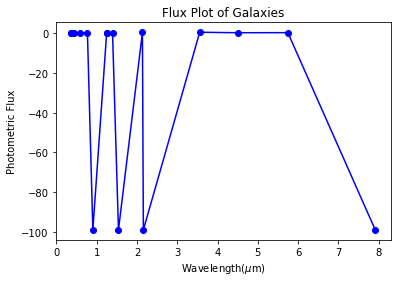

In [32]:
plt.plot(X,Y[26],'bo-')
plt.xlabel('Wavelength($\mu$m)')
plt.ylabel('Photometric Flux')
plt.title('Flux Plot of Galaxies')

# Data Cleaning 2.0

This cleaning is done to remove all the fluxes having values of -99.0

In [33]:
arrc2 = np.delete(arrc, np.where(arrc[:,7:23] == -99.0), axis = 0)

In [34]:
len(arrc2)

2043

In [35]:
arrc

array([[38, 'CANDELS_GDN_J123633.7+620551.9', 189.14055756, ..., 0.002,
        1, 1.323],
       [47, 'CANDELS_GDN_J123637.3+620556.8', 189.15526685, ..., 0.023,
        2, 1.875],
       [65, 'CANDELS_GDN_J123635.1+620603.0', 189.14613186, ..., 0.002,
        1, 0.4107],
       ...,
       [34976, 'CANDELS_GDN_J123654.2+622131.1', 189.22576143, ...,
        0.022, 3, 0.74],
       [35272, 'CANDELS_GDN_J123701.3+622127.9', 189.2553892, ..., 0.182,
        3, 5.69],
       [35447, 'CANDELS_GDN_J123719.4+622023.8', 189.33066692, ...,
        0.149, 2, 1.026]], dtype=object)

In [36]:
len(np.where(np.any(arrc2[:,7:23] < 10, axis=1))[0])


2028

In [37]:
np.where(arrc2[:,41]>5)

(array([ 742, 1128, 1484]),)

In [38]:
arrc2[1128,41]

99.0

In [39]:
arrc2 = np.delete(arrc2, np.where(arrc2[:,41] > 15.0), axis = 0)

# Plot after final clean

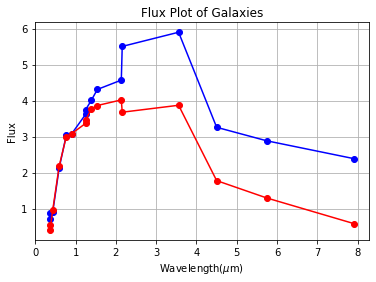

In [40]:
plt.plot(X,arrc2[5,7:23],'bo-')
plt.plot(X,arrc2[2,7:23],'ro-')
plt.xlabel('Wavelength($\mu$m)')
plt.ylabel('Flux')
plt.title('Flux Plot of Galaxies')
plt.grid(visible = 'True')

#plt.figure(figsize=(200, 200), dpi=800)

# Gradient boosted regression trees

### Importing all the important libraries

In [41]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Loading data

In [42]:
X_dat = arrc2[:,7:23]

In [43]:
Y_dat = arrc2[:,41]

### Data preprocessing

In [44]:
#X_train, X_test, Y_train, Y_test = train_test_split(X_dat, Y_dat, test_size=0.2, random_state=13)

#### K-fold Cross Validation

In [45]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_dat)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [46]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

### Fitting Regression Model

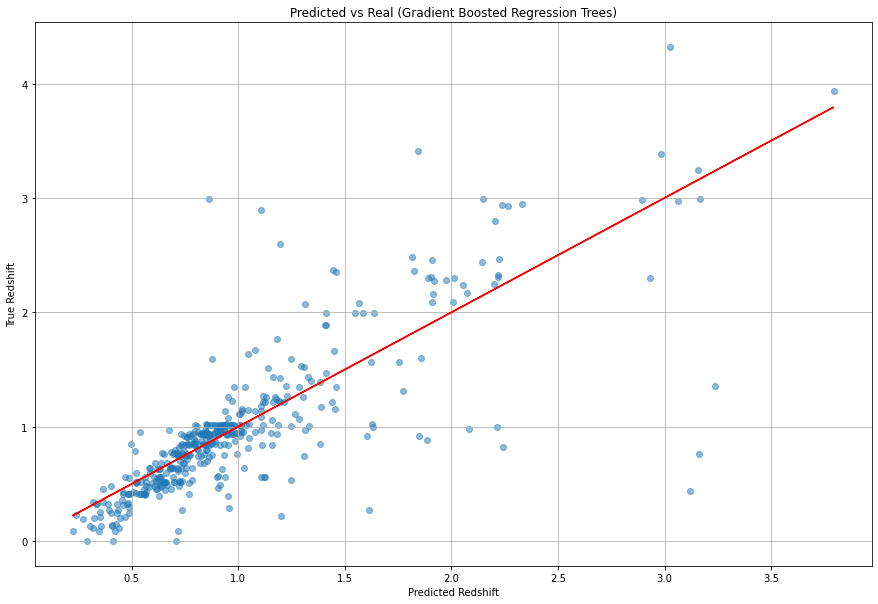

<Figure size 432x432 with 0 Axes>

0.1541218874561951


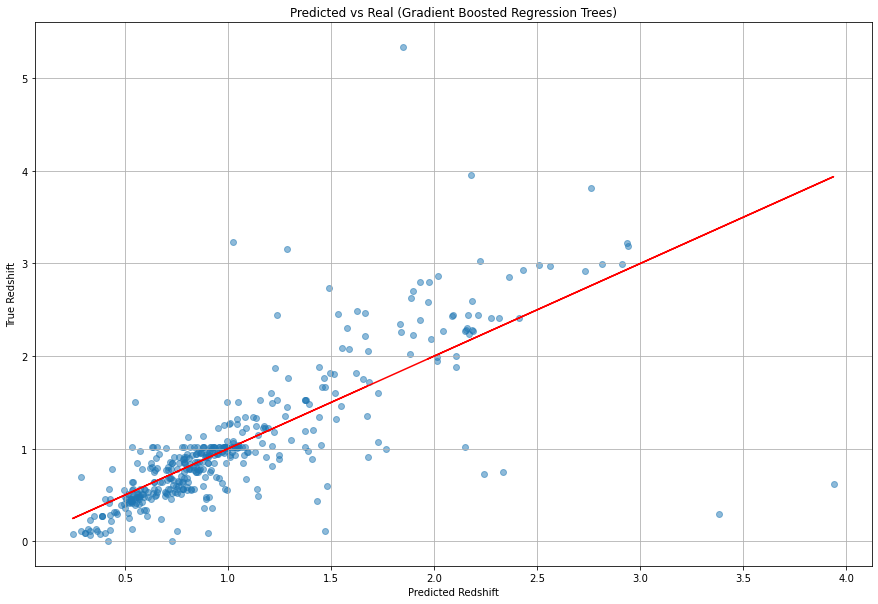

<Figure size 432x432 with 0 Axes>

0.211682673191214


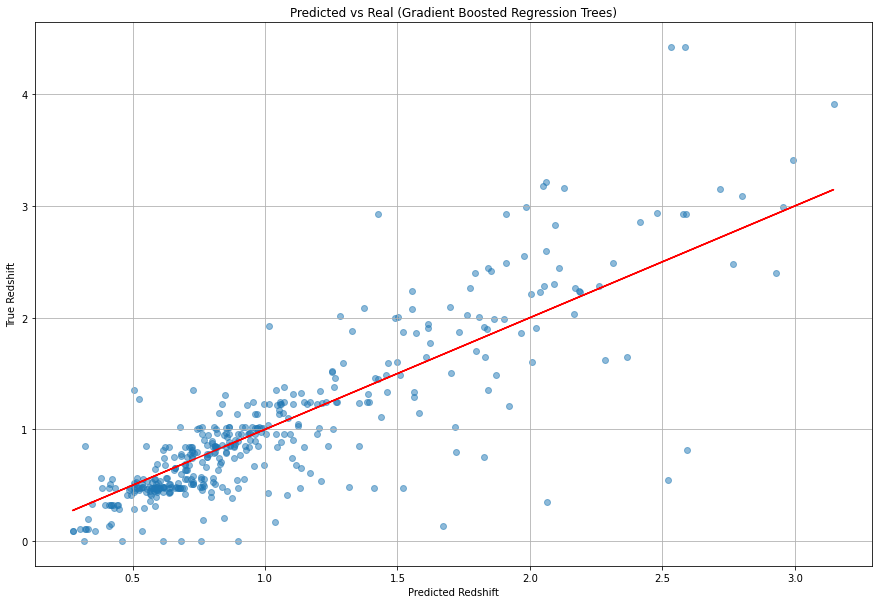

<Figure size 432x432 with 0 Axes>

0.1503335293251351


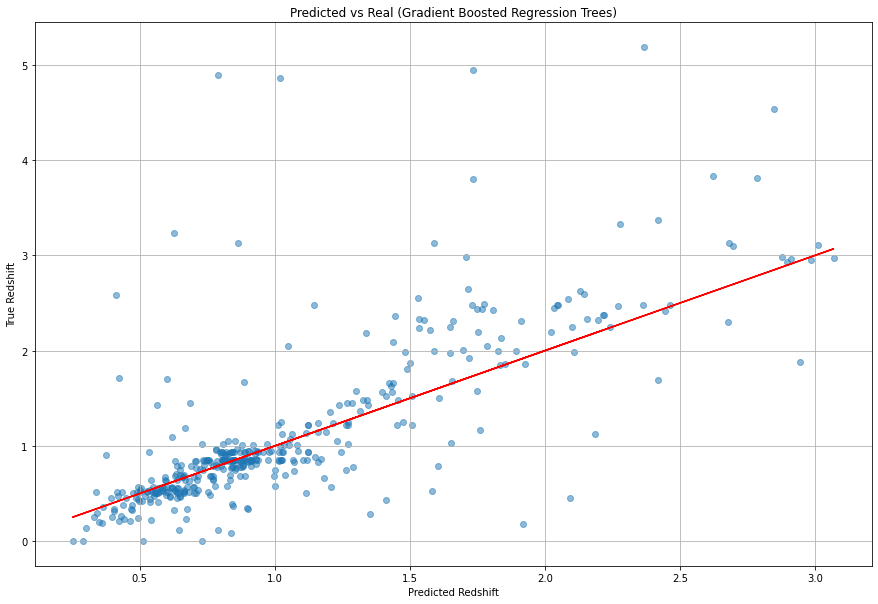

<Figure size 432x432 with 0 Axes>

0.3105837177145043


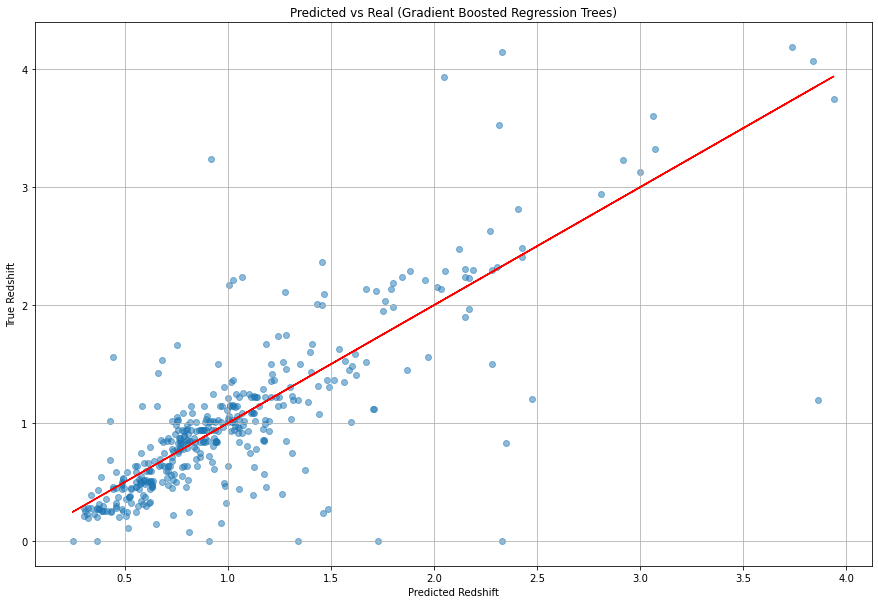

<Figure size 432x432 with 0 Axes>

0.17138744812281884


In [47]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, Y_train)
    
    arry = Y_test
    arrx = reg.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Gradient Boosted Regression Trees)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

In [48]:
len(reg.predict(X_test))

408

In [49]:
len(Y_test)

408

In [50]:
np.where(Y_test > 5)

(array([], dtype=int64),)

In [51]:
Y_test[24]

0.6041

In [52]:
mse = mean_squared_error(arry, arrx)
mse

0.17138744812281884

### Mean Squared Error plot

In [53]:
#mse1 = np.zeros(len(list(range(1,100,1))))
#for i in list(range(1,100,1)):
 #   X_train, X_test, Y_train, Y_test = train_test_split(X_dat, Y_dat, test_size=i/100, random_state=13)
  #  reg.fit(X_train, Y_train)
   # mse1[i-1] = mean_squared_error(Y_test,reg.predict(X_test))

In [54]:
#mse1

In [55]:
# fig = plt.figure(figsize=(15, 10))
# fig.tight_layout()
# Xmse = list(range(1,100,1))
# Xmse1 = list(map(lambda x: 1 - (x/100), Xmse))
# #Xmse
# #newList = map(lambda x: x/myInt, myList)
# #Xmse1
# #Xmse1 = 2043*(Xmse1)
# plt.plot(Xmse1, mse1, 'g-')
# plt.xlabel('% Train Data')
# plt.ylabel('Mean Squared Error')
# #plt.xticks(np.arange(0,100, 1.0))
# plt.grid(visible=True)

# Gaussian Process

In [56]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [57]:
kernel = DotProduct() + WhiteKernel()

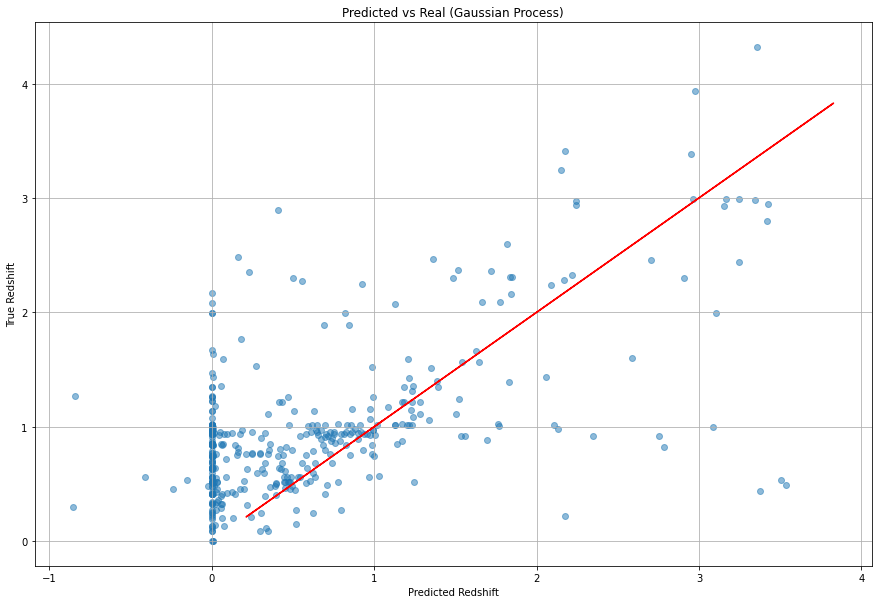

<Figure size 432x432 with 0 Axes>

0.5849351997392179


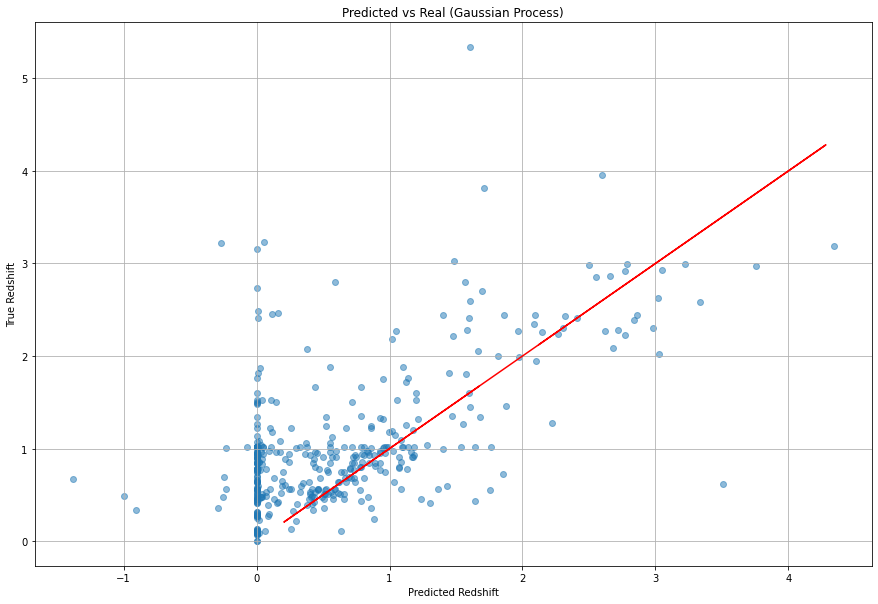

<Figure size 432x432 with 0 Axes>

0.6474107863550077


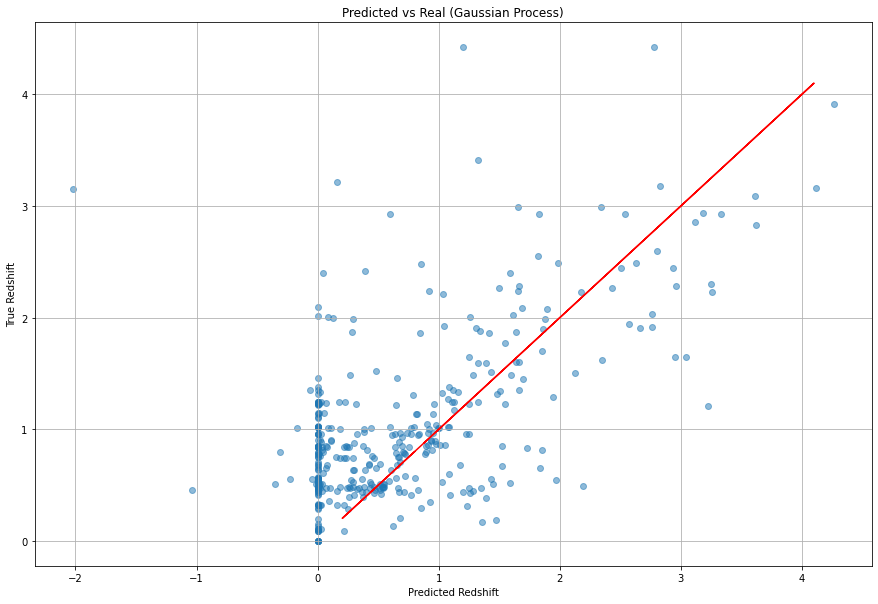

<Figure size 432x432 with 0 Axes>

0.6277570355226243


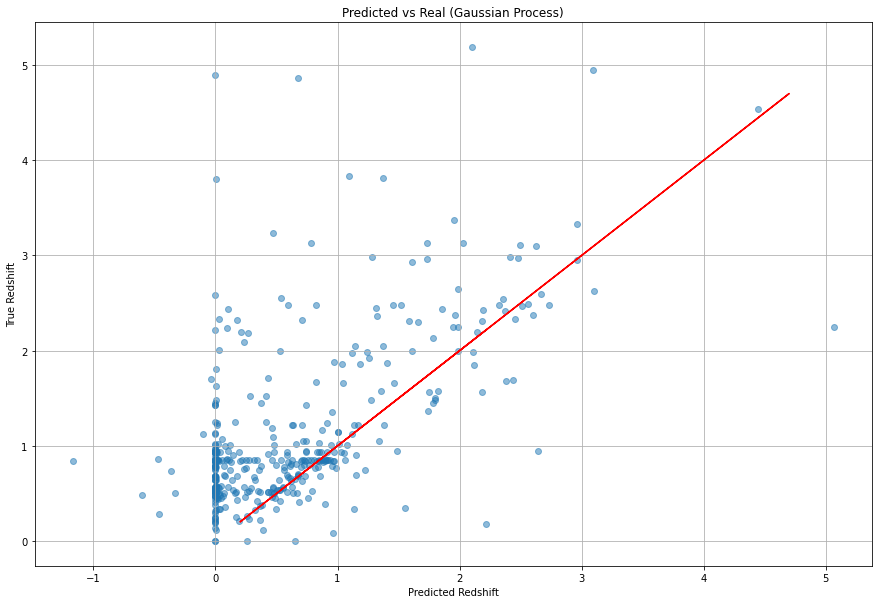

<Figure size 432x432 with 0 Axes>

0.7902571523998128


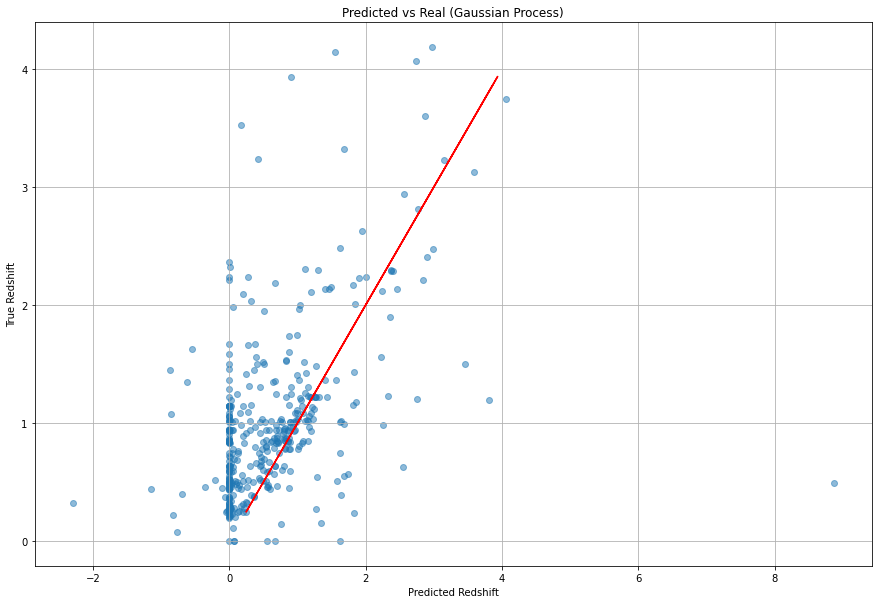

<Figure size 432x432 with 0 Axes>

0.8308411500300489


In [58]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    gpr = GaussianProcessRegressor().fit(X_train, Y_train)
    
    arry = Y_test
    arrx = gpr.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Gaussian Process)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rgr = RandomForestRegressor(max_depth=2, random_state=0)

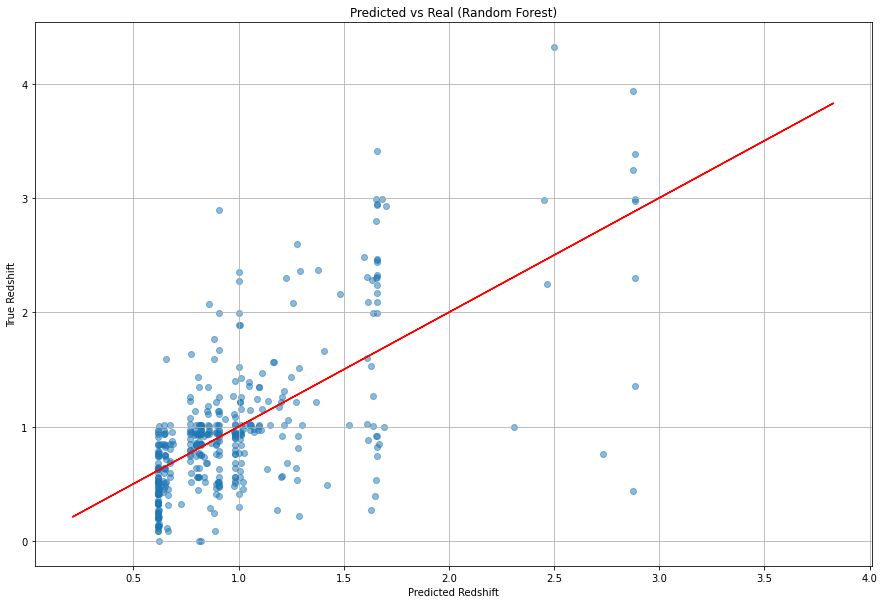

<Figure size 432x432 with 0 Axes>

0.24215847804082904


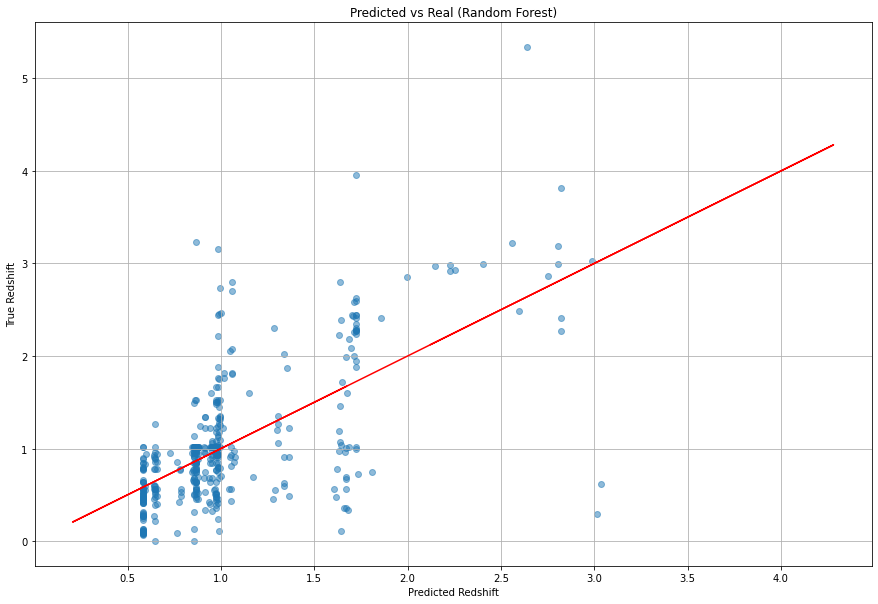

<Figure size 432x432 with 0 Axes>

0.3118532882980696


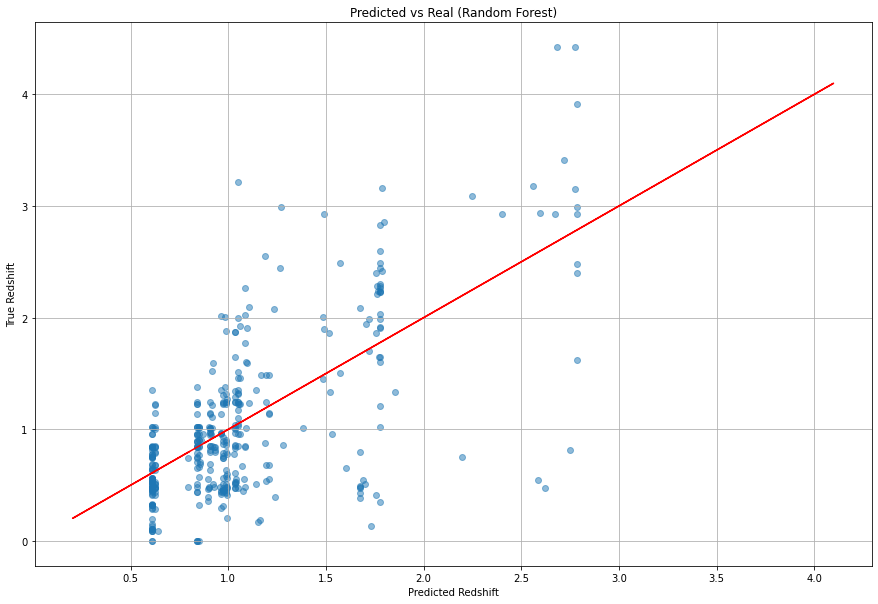

<Figure size 432x432 with 0 Axes>

0.2848368163982345


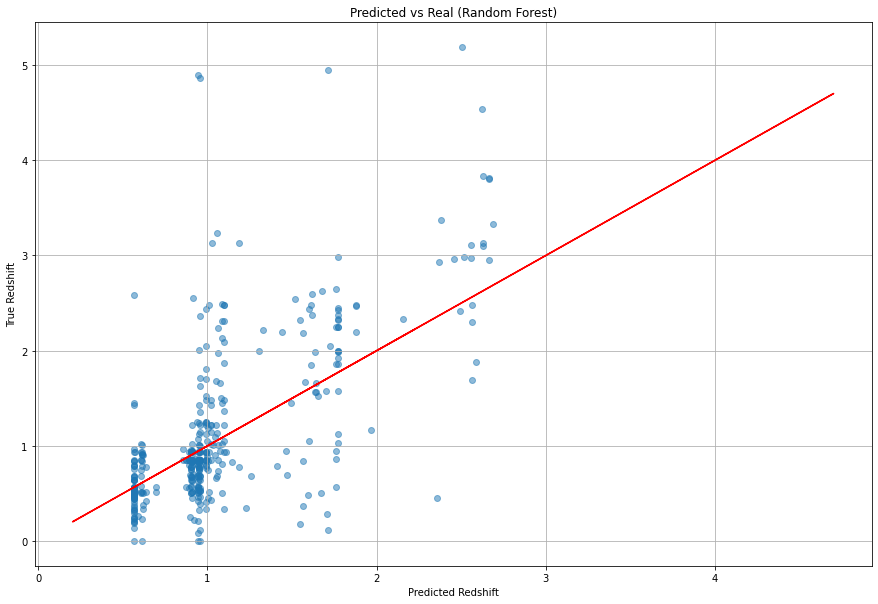

<Figure size 432x432 with 0 Axes>

0.40517406786686816


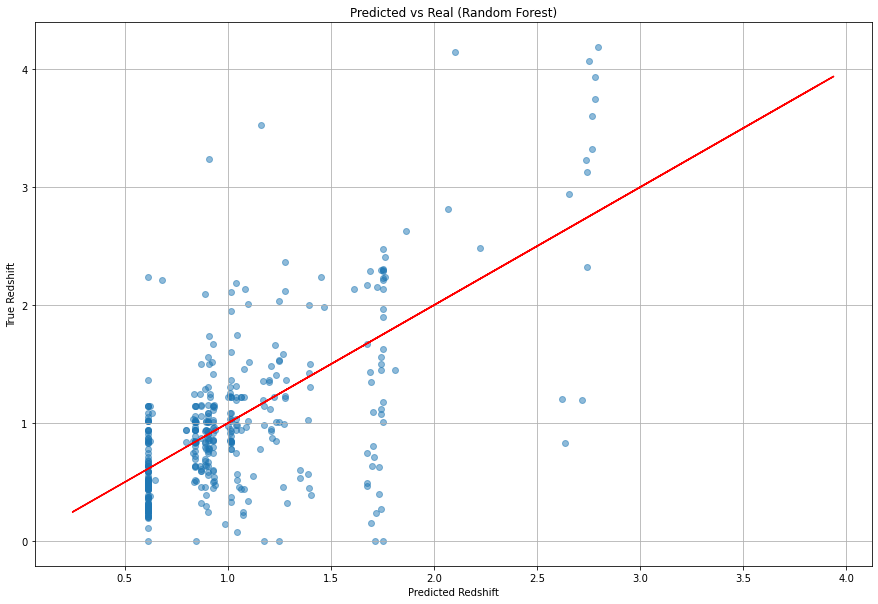

<Figure size 432x432 with 0 Axes>

0.2809448249096437


In [61]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    rgr.fit(X_train,Y_train)
    
    arry = Y_test
    arrx = rgr.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Random Forest)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

# Adaboost Regressor

In [62]:
from sklearn.ensemble import AdaBoostRegressor

In [63]:
regr = AdaBoostRegressor(random_state=0, n_estimators=10000)

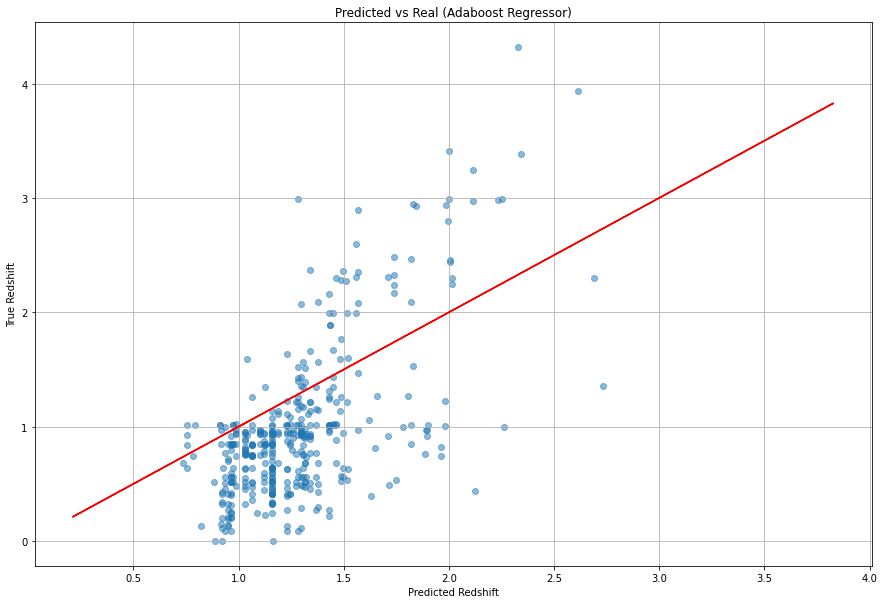

<Figure size 432x432 with 0 Axes>

0.35902545846683354


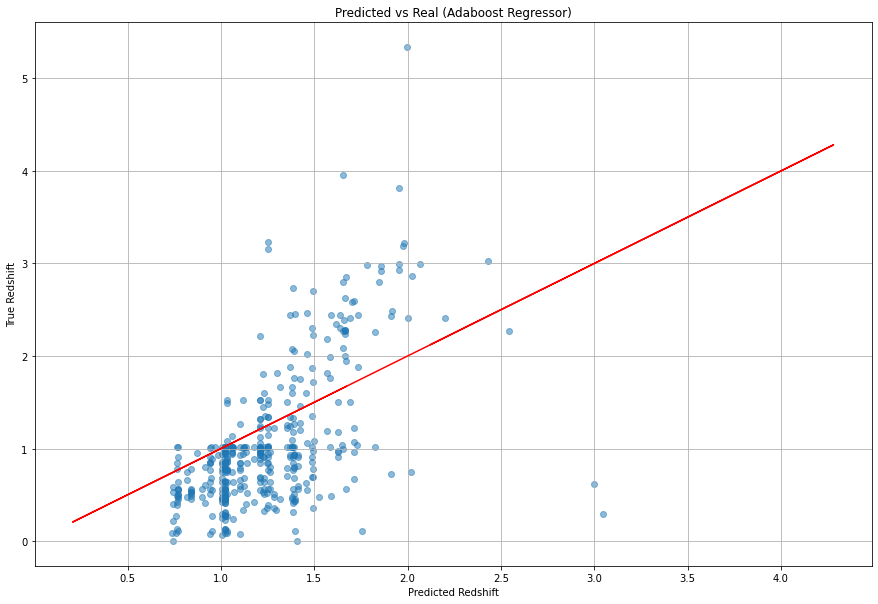

<Figure size 432x432 with 0 Axes>

0.4080246060993506


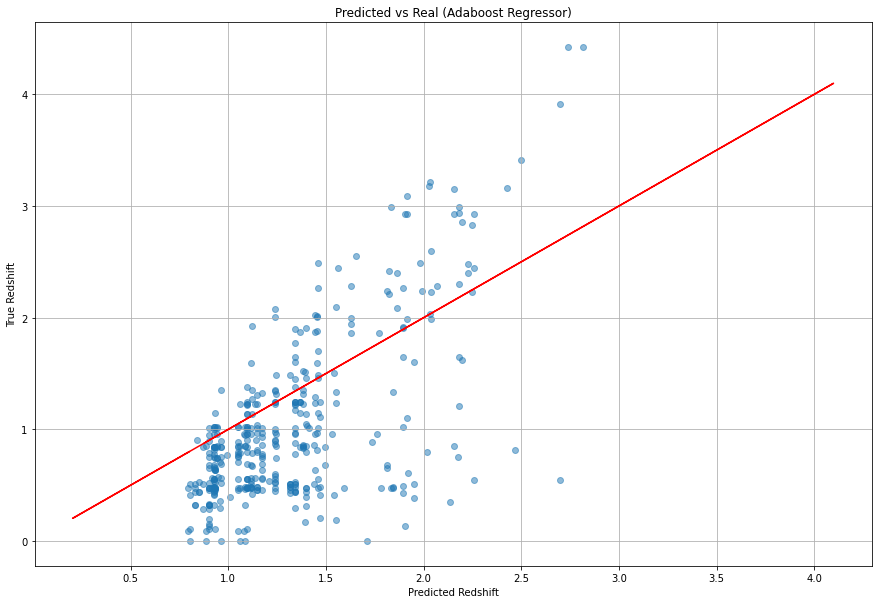

<Figure size 432x432 with 0 Axes>

0.39542199488434987


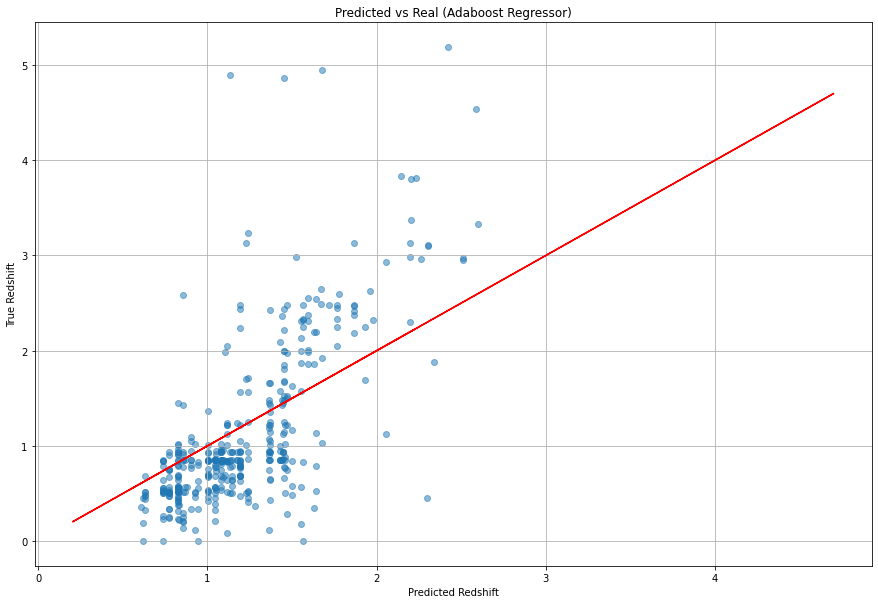

<Figure size 432x432 with 0 Axes>

0.41615880847469955


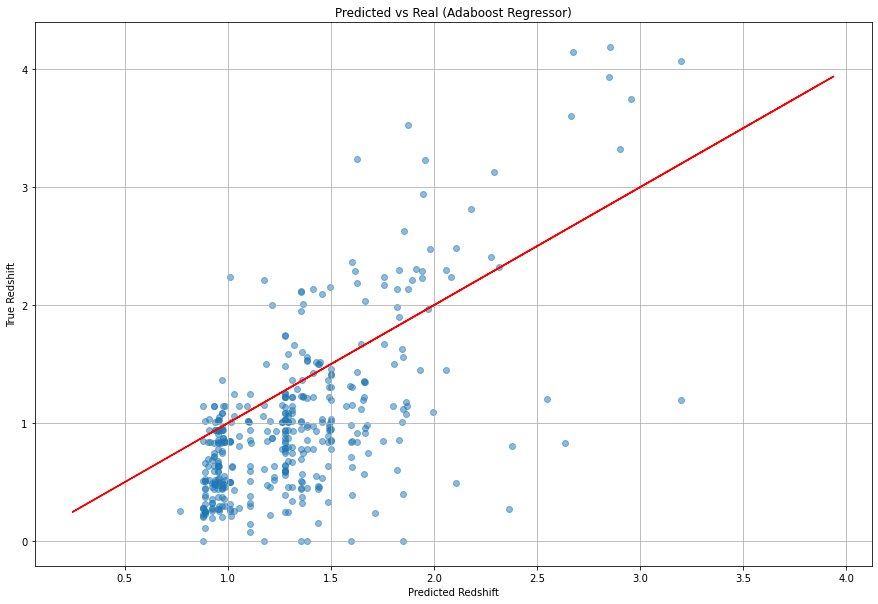

<Figure size 432x432 with 0 Axes>

0.3789020691070856


In [64]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    regr.fit(X_train,Y_train)
    
    arry = Y_test
    arrx = regr.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Adaboost Regressor)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

# K-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
neigh = KNeighborsRegressor(n_neighbors=100)

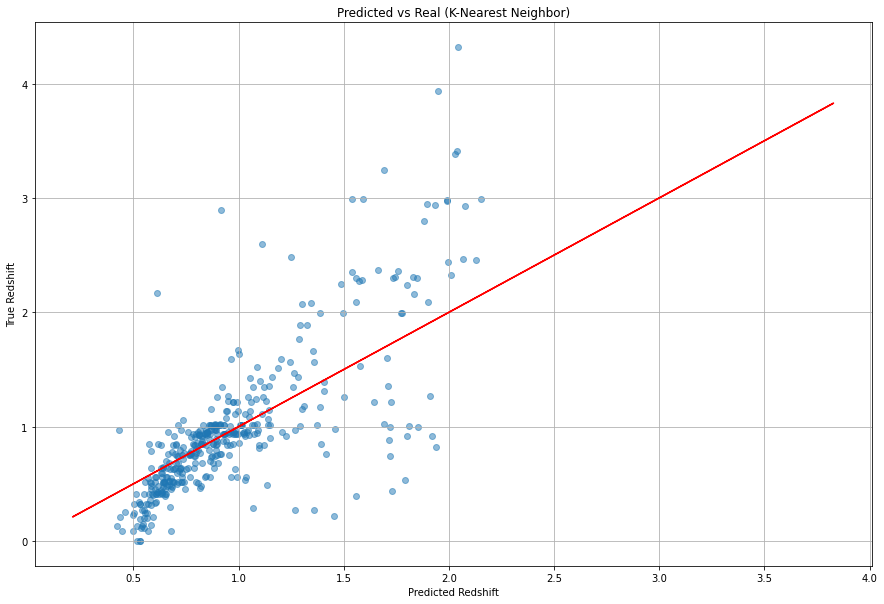

<Figure size 432x432 with 0 Axes>

0.18905826503915896


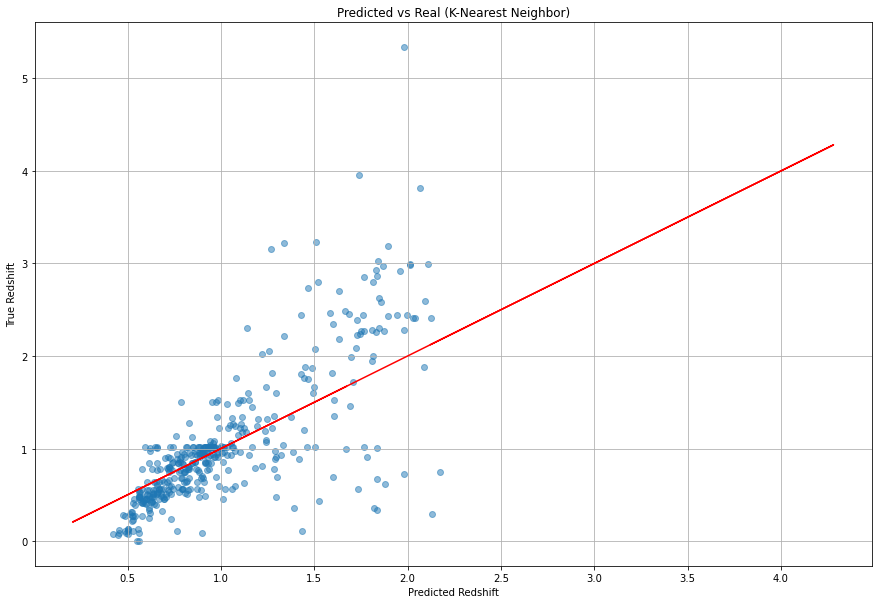

<Figure size 432x432 with 0 Axes>

0.2511887367662494


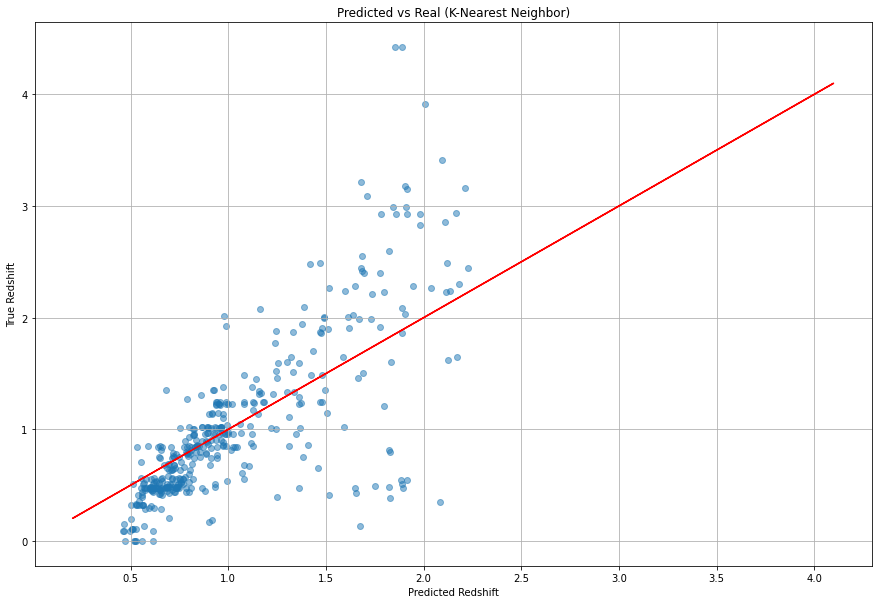

<Figure size 432x432 with 0 Axes>

0.23354328602475735


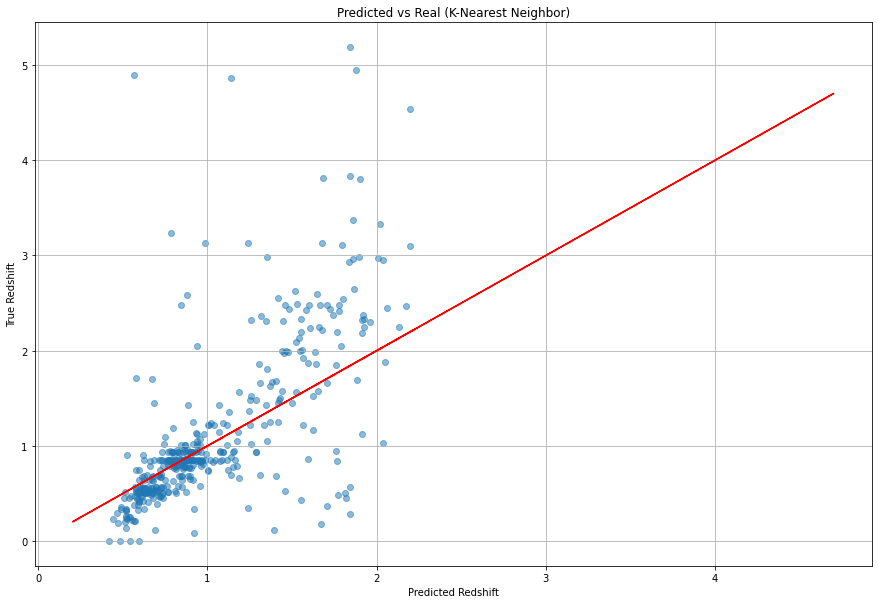

<Figure size 432x432 with 0 Axes>

0.4129861520290955


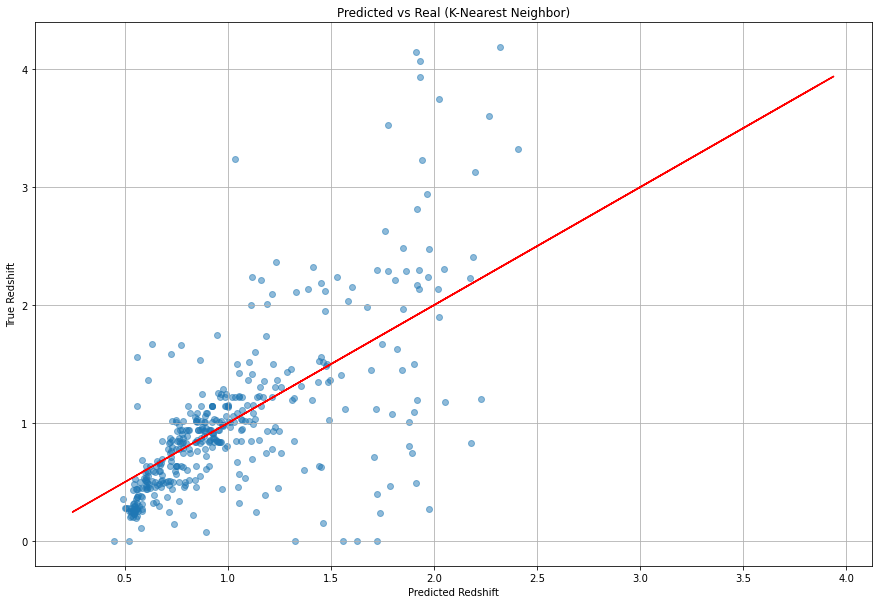

<Figure size 432x432 with 0 Axes>

0.2597171019853701


In [67]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    neigh.fit(X_train,Y_train)
    
    arry = Y_test
    arrx = neigh.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (K-Nearest Neighbor)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lin = LinearRegression()

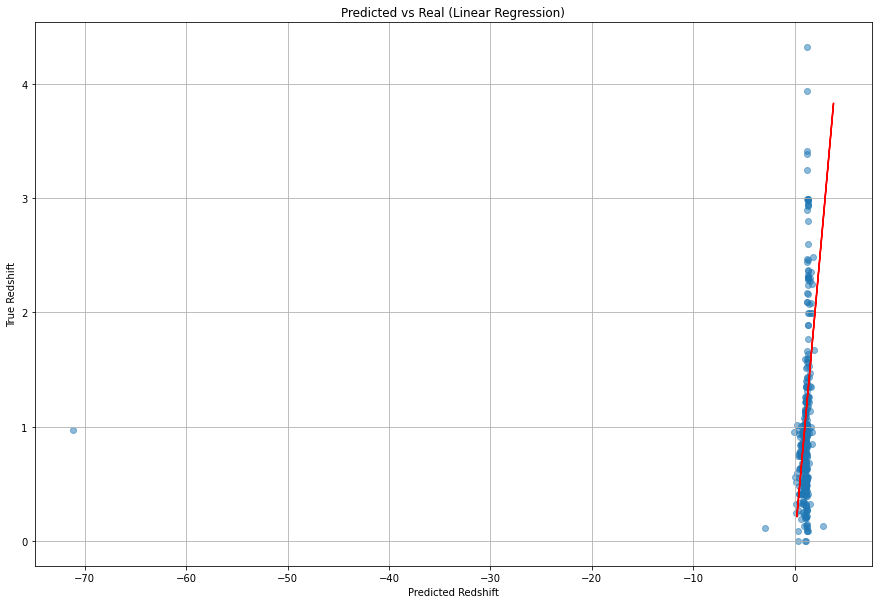

<Figure size 432x432 with 0 Axes>

13.124782944011624


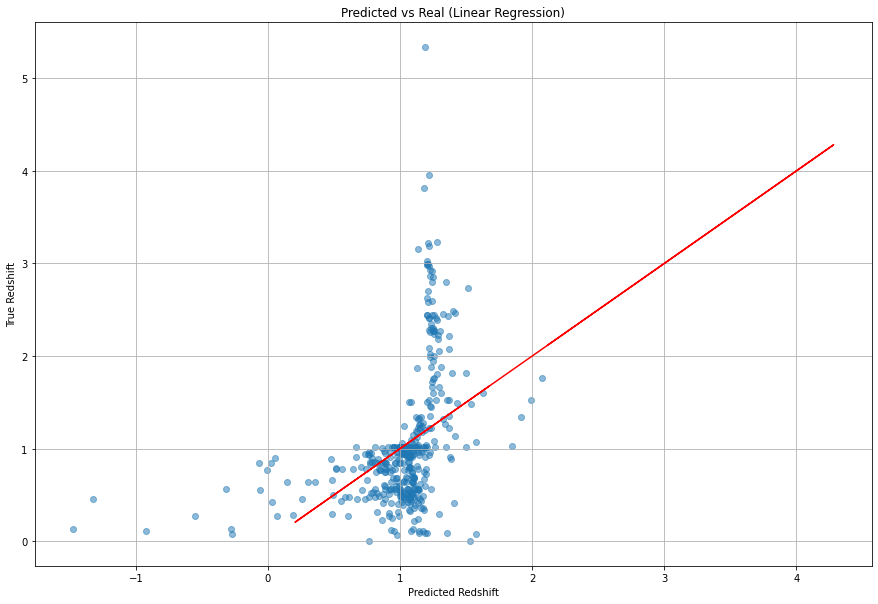

<Figure size 432x432 with 0 Axes>

0.47560788303894974


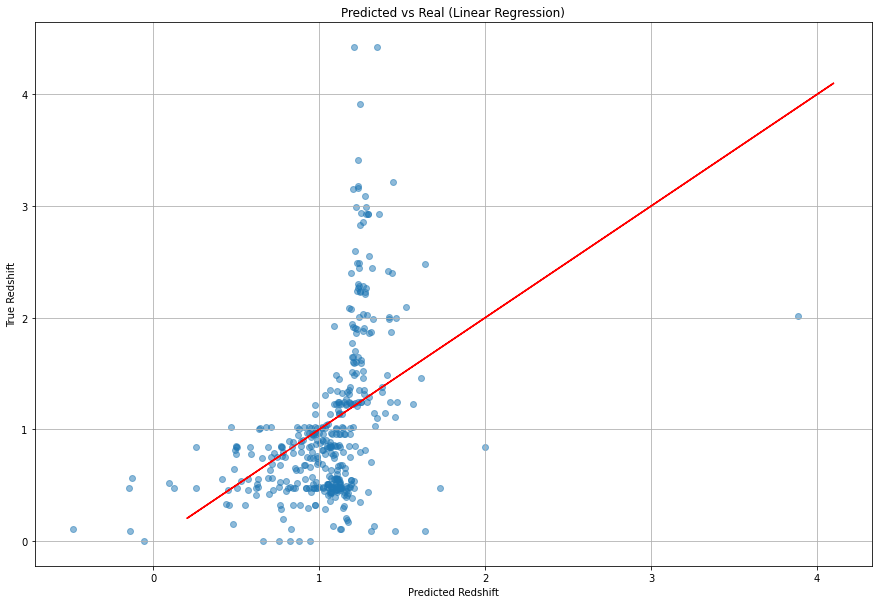

<Figure size 432x432 with 0 Axes>

0.4434980936731037


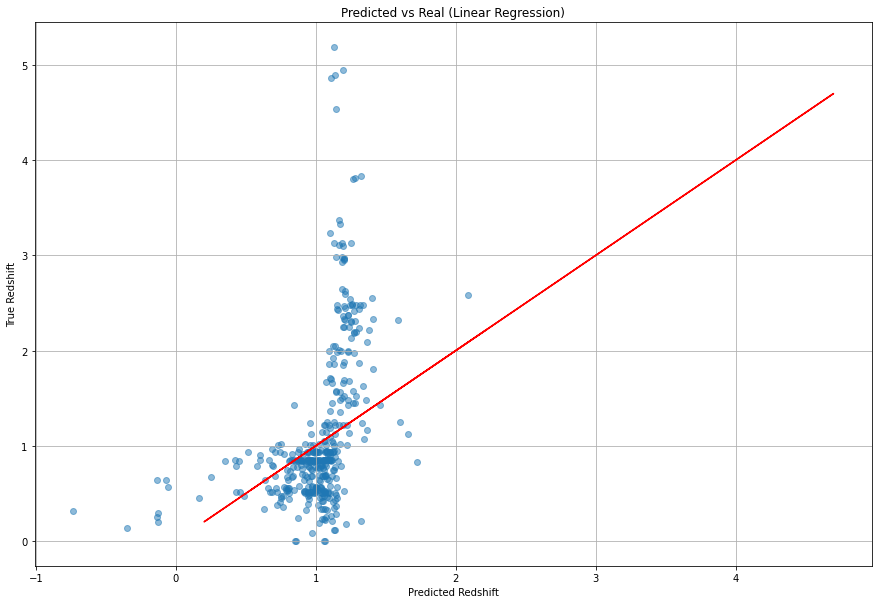

<Figure size 432x432 with 0 Axes>

0.6163151616339055


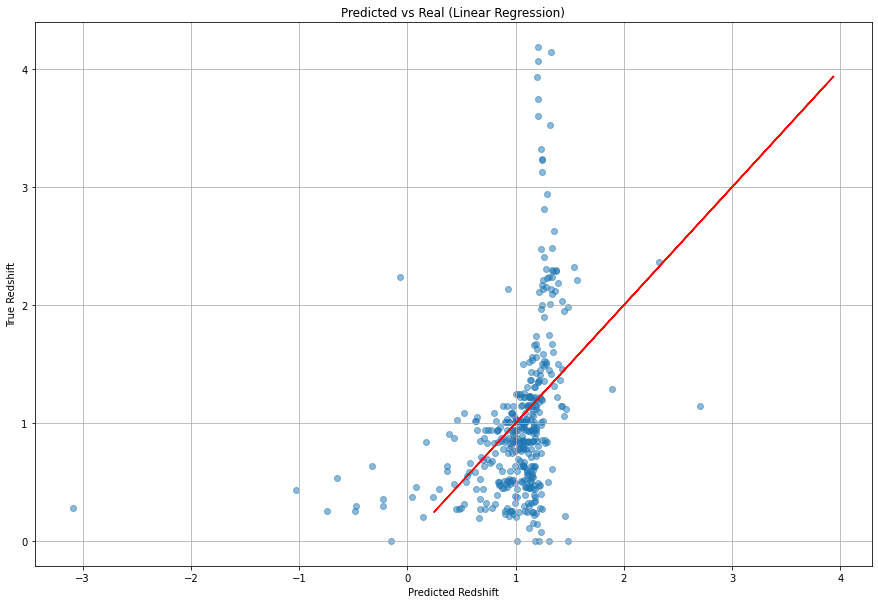

<Figure size 432x432 with 0 Axes>

0.4611215780334181


In [70]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    lin.fit(X_train, Y_train)
    
    arry = Y_test
    arrx = lin.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Linear Regression)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

# Support Vector Machine (SVM) - RBF

In [71]:
from sklearn.svm import SVR

In [75]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

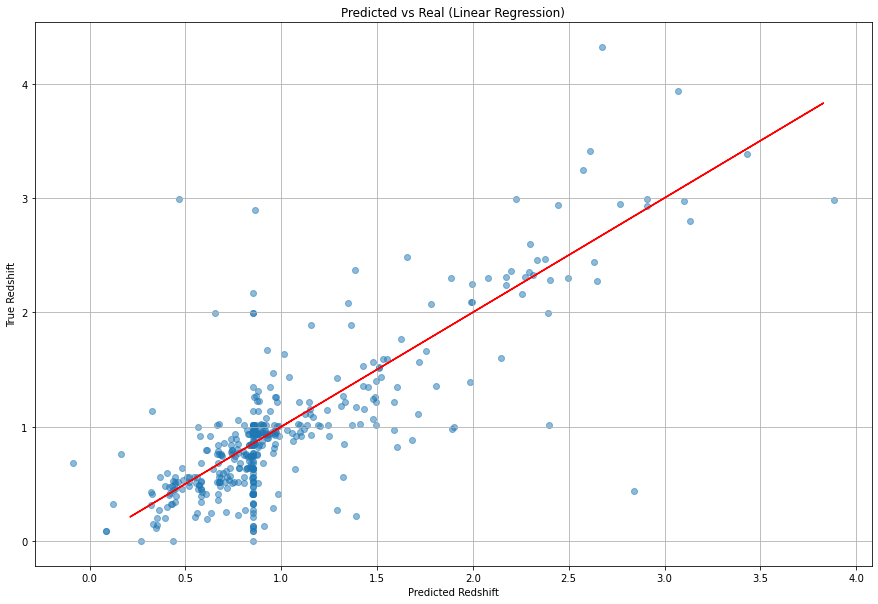

<Figure size 432x432 with 0 Axes>

0.1560923782171602


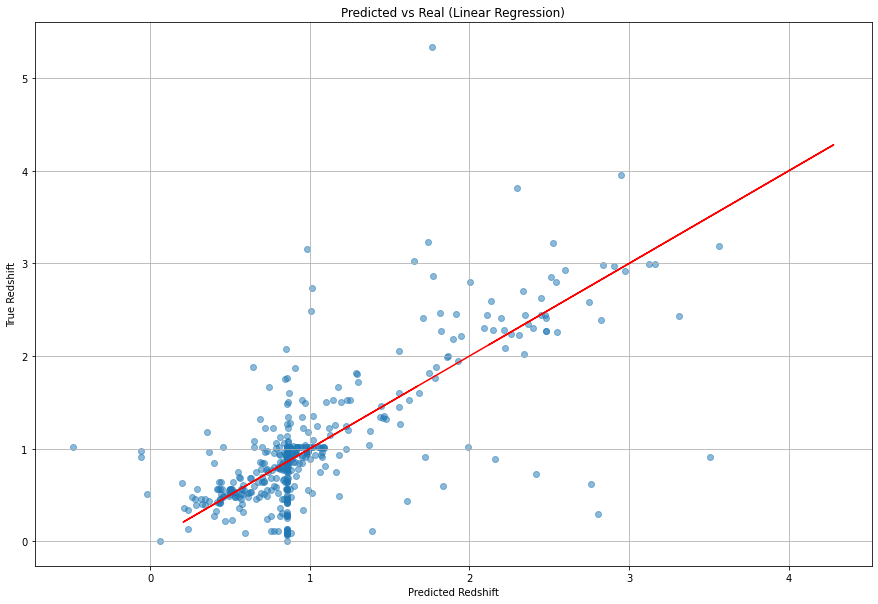

<Figure size 432x432 with 0 Axes>

0.2514239628362475


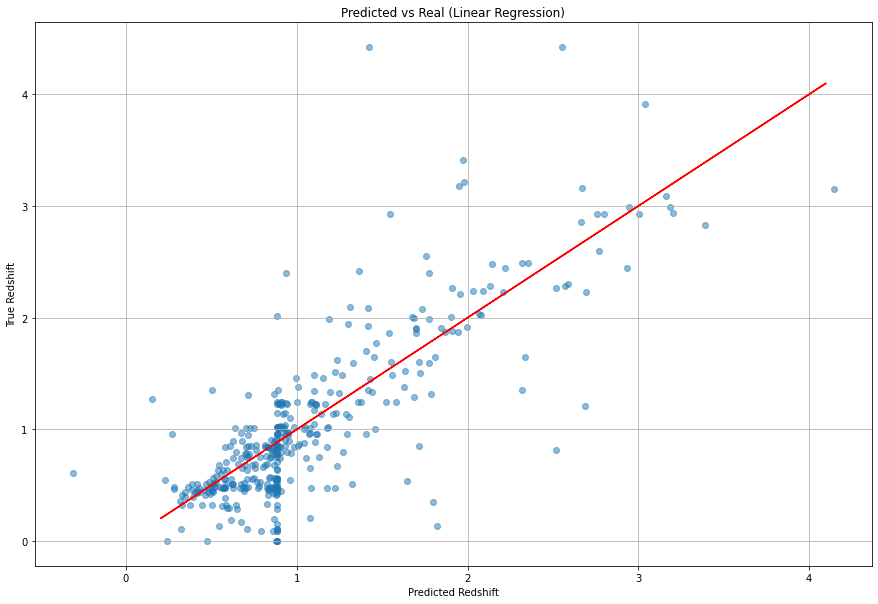

<Figure size 432x432 with 0 Axes>

0.18851149219781496


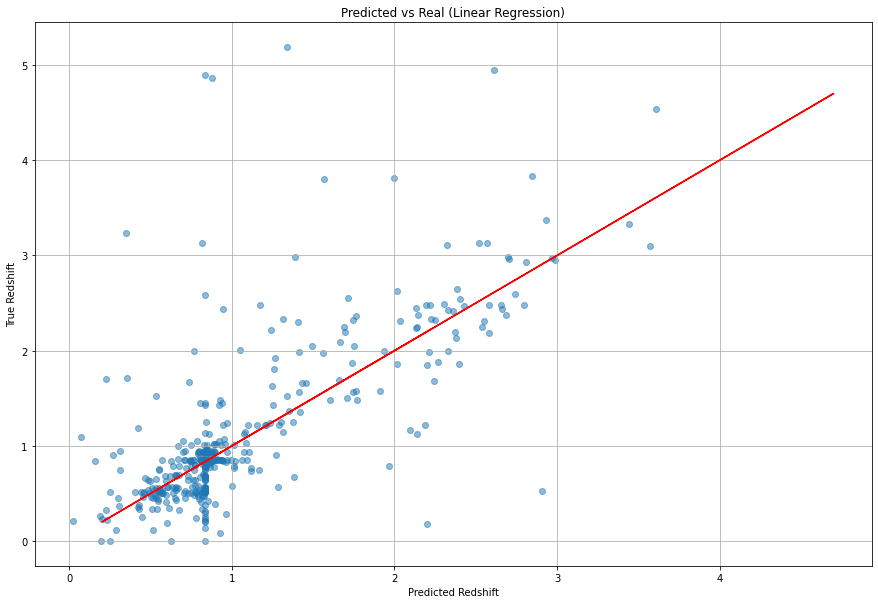

<Figure size 432x432 with 0 Axes>

0.34251048536442463


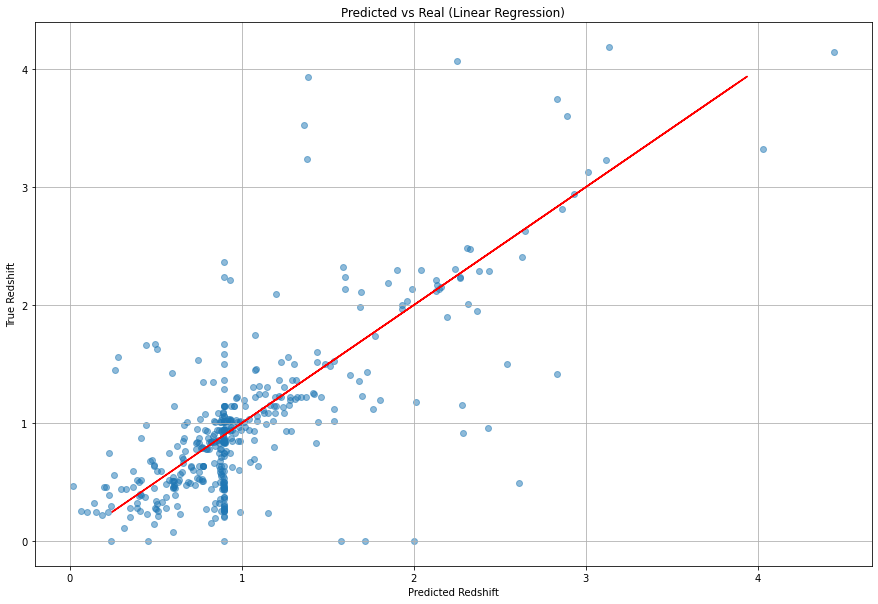

<Figure size 432x432 with 0 Axes>

0.21710846377179668


In [76]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    svr_rbf.fit(X_train, Y_train)
    
    arry = Y_test
    arrx = svr_rbf.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Linear Regression)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

# Gaussian-Naiive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
clf = GaussianNB()

In [79]:
for train_index, test_index in kf.split(X_dat):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_dat[train_index], X_dat[test_index]
    Y_train, Y_test = Y_dat[train_index], Y_dat[test_index]
    clf.fit(X_train, Y_train)
    
    arry = Y_test
    arrx = clf.predict(X_test)

    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()
    plt.scatter(arrx,arry,alpha=0.5)
    plt.plot(reg.predict(X_test),reg.predict(X_test),'r-')
    plt.xlabel('Predicted Redshift')
    plt.ylabel('True Redshift')
    plt.title('Predicted vs Real (Linear Regression)')
    plt.grid(visible = True)
    fig = plt.figure(figsize=(6, 6))
    fig.tight_layout()
    plt.show()
    
    mse = mean_squared_error(arry, arrx)
    print(mse)

ValueError: Unknown label type: (array([0.0001, 0.0002, 0.0003, ..., 4.945, 5.19, 5.34], dtype=object),)